In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from utils import Utils
from knn import Knn

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
import seaborn as sns

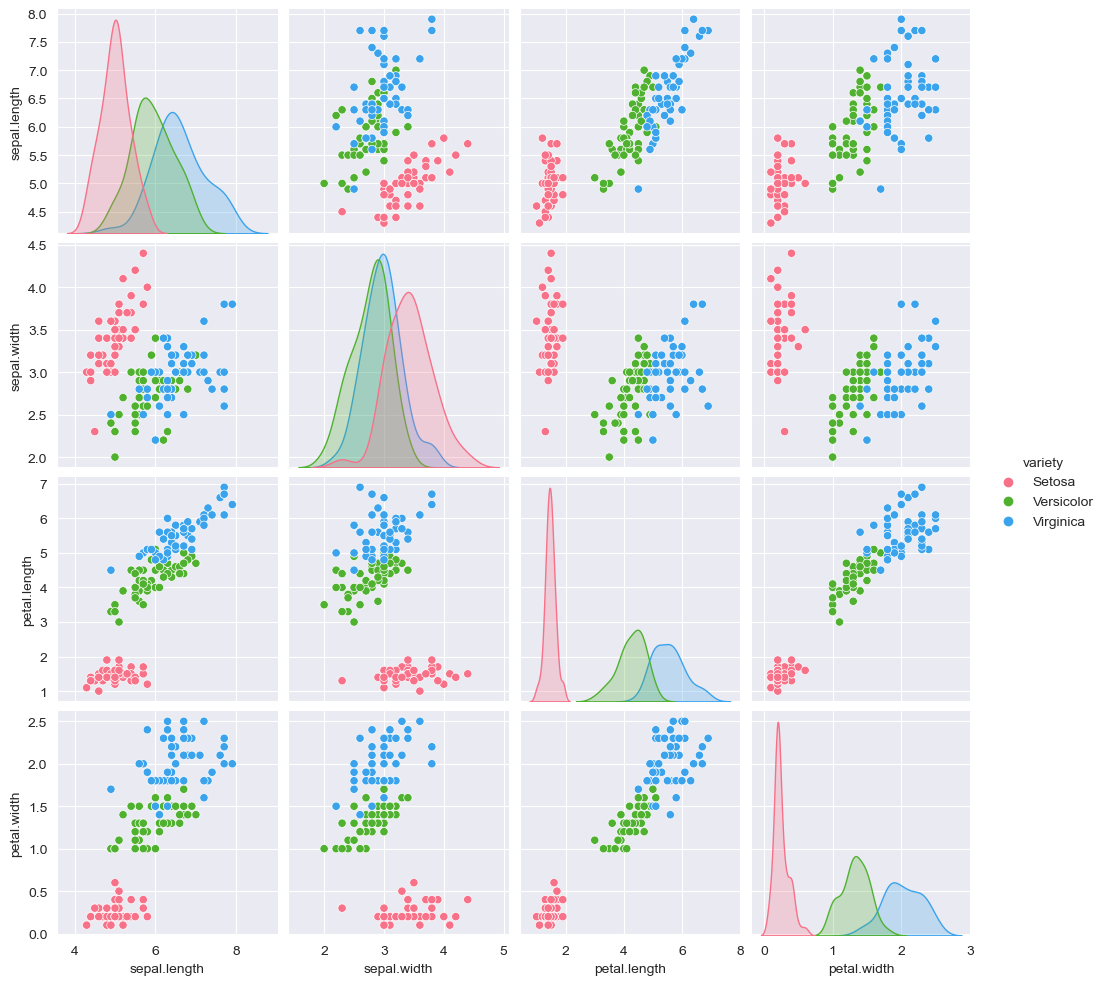

In [8]:
sns.pairplot(df,hue='variety',palette='husl')
plt.show()

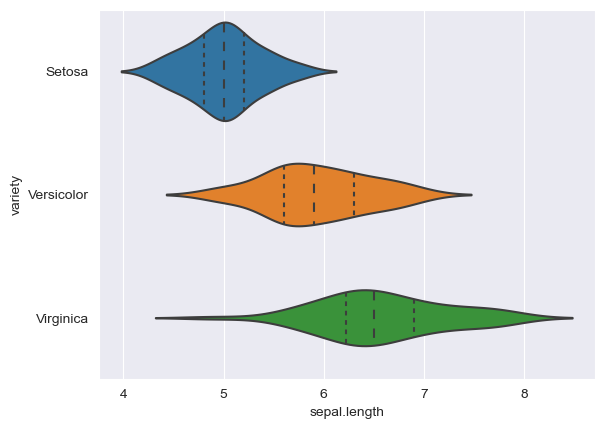

In [9]:
sns.violinplot(y='variety',x='sepal.length',data=df,inner='quartille')
plt.show()

In [10]:
labels = ['sepal.length','sepal.width','petal.length','petal.width']

In [11]:
df = pd.read_csv('iris.csv')
df = Utils.normalize(df)
df = Utils.shuffle(df)
train, test = Utils.split(df,0.7)

In [12]:
knn = Knn(train, test, labels,'variety',5,2)
trained = knn.train_model()
print(f"accuracy of model : {knn.check_model(trained)}")

accuracy of model : 97.77777777777777


Check for best n and k

In [13]:
stats = [[None for x in range(5)] for y in range(3)]
stats_mean = [[None for x in range(5)] for y in range(3)]
stats_std = [[None for x in range(5)] for y in range(3)]
for i,k in enumerate([3,5,7]):
    for m in range(1,6):
        one_run = []
        for _ in range(10):
            df = pd.read_csv('iris.csv')
            df = Utils.shuffle(df)
            df = Utils.normalize(df)
            train, test = Utils.split(df,0.7)
            knn = Knn(train, test, labels,'variety',k,m)
            trained = knn.train_model()
            percentage = knn.check_model(trained)
            one_run.append(percentage)
        stat_mean = np.mean(one_run)
        stat_std = np.std(one_run)
        stats[i][m-1] = [stat_mean,stat_std]
        stats_mean[i][m-1] = stat_mean
        stats_std[i][m-1] = stat_std


In [14]:
means = pd.DataFrame(stats_mean,columns=range(1,6),index=range(1,4))
means.index.names = ['n']
means.columns.names = ['k']
stds = pd.DataFrame(stats_std,columns=range(1,6),index=range(1,4))
stds.index.names = ['n']
stds.columns.names = ['k']
df = pd.DataFrame(stats,columns=range(1,6),index=range(1,4))
df

,1,2,3,4,5
1,"[93.77777777777779, 2.5915341754867987]","[95.77777777777779, 2.888888888888886]","[95.33333333333333, 2.712567914607486]","[94.88888888888889, 2.6387426860084253]","[94.88888888888889, 2.9896942326830476]"
2,"[93.77777777777779, 2.3934065809486684]","[95.11111111111111, 2.3934065809486684]","[95.55555555555557, 1.7213259316477403]","[96.66666666666667, 2.277100170213241]","[94.88888888888889, 3.1505437508350695]"
3,"[94.88888888888889, 2.81968389787767]","[95.33333333333334, 2.3200681130912315]","[97.11111111111111, 1.4229164972072985]","[94.0, 3.8554114606438823]","[94.66666666666666, 2.845832994414598]"


In [15]:
means

k,1,2,3,4,5
n,,,,,
1,93.777778,95.777778,95.333333,94.888889,94.888889
2,93.777778,95.111111,95.555556,96.666667,94.888889
3,94.888889,95.333333,97.111111,94.000000,94.666667


In [16]:
stds

k,1,2,3,4,5
n,,,,,
1,2.591534,2.888889,2.712568,2.638743,2.989694
2,2.393407,2.393407,1.721326,2.277100,3.150544
3,2.819684,2.320068,1.422916,3.855411,2.845833
